<a href="https://colab.research.google.com/github/SlickMik/ensf692Project/blob/main/ENSF_692_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%autosave 2

Autosaving every 2 seconds


# ESNF 692 Project
### Group # : 4
##### Authors : Danish Shahid () | Muhammad Ibrahim Khan ()
---

This notebook describes the correlation of asset classes - Oil, Gold, and S&P500 for a user selected time range

---

Importing Libraries

In [ ]:
import kagglehub
import numpy as np
import pandas as pd
import matplotlib as mp
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.dates as mdates

# Dataset Selection

Downloading Kaggle Datasets

In [ ]:
# Download latest dataset versions
gold_dataset_path = kagglehub.dataset_download("faisaljanjua0555/daily-gold-price-historical-dataset")

oil_dataset_path = kagglehub.dataset_download("guillemservera/fuels-futures-data")

sp_dataset_path = kagglehub.dataset_download("youcanttouchthis/s-p-500-dataset")

# Dataset Creation

* Reading Dataset to Pandas<br/>
* Dropping unnecessary columns<br/>
* Setting index to Date<br/>
* Parsing Date

In [ ]:
# read csv files into pandas
gold_dataset = pd.read_csv(gold_dataset_path + f'/gold.csv', index_col='Date', parse_dates=True)

oil_dataset = pd.read_csv(oil_dataset_path + f'/all_fuels_data.csv', index_col='date', parse_dates=True)

sp_dataset = pd.read_csv(sp_dataset_path + f'/spy.csv', index_col='Date', parse_dates=True)

Gold Dataset
* Dropping Columns
* Renaming Columns

Describing Gold Dataset

In [ ]:
gold_dataset = gold_dataset.drop(columns='Currency').rename(columns = {c : f'Gold_{c}' for c in gold_dataset.columns})
gold_dataset.head(3)

,Gold_Open,Gold_High,Gold_Low,Gold_Close,Gold_Volume
Date,,,,,
2000-01-04,289.5,289.5,280.0,283.7,21621
2000-01-05,283.7,285.0,281.0,282.1,25448
2000-01-06,281.6,282.8,280.2,282.4,19055


Oil Dataset
* Dropping Columns
* Reorganizing Columns
* Renaming Columns
* Cleaning Columns

Describing Oil Dataset

In [ ]:
oil_dataset = oil_dataset[oil_dataset['commodity'].str.lower().str.fullmatch('crude oil')]
oil_dataset = oil_dataset.drop(columns=['ticker', 'commodity'])
oil_dataset.rename_axis(index={'date':'Date'}, inplace=True)
oil_dataset.columns = oil_dataset.columns.str.capitalize()

oil_dataset = (
    oil_dataset[['Open', 'High', 'Low', 'Close', 'Volume']]
    .rename(columns={c : f'Oil_{c.title()}' for c in oil_dataset.columns})
)
oil_dataset.head(3)

,Oil_Open,Oil_High,Oil_Low,Oil_Close,Oil_Volume
Date,,,,,
2000-08-23,31.950001,32.799999,31.950001,32.049999,79385
2000-08-24,31.900000,32.240002,31.400000,31.629999,72978
2000-08-25,31.700001,32.099998,31.320000,32.049999,44601


S&P 500 Dataset
* Dropping Columns
* Renaming Columns

Describing S&P 500 Dataset

In [ ]:
sp_dataset = sp_dataset.drop(columns='Adj Close').rename(columns = {c : f'S&P500_{c}' for c in sp_dataset.columns})
sp_dataset.head(3)

,S&P500_Open,S&P500_High,S&P500_Low,S&P500_Close,S&P500_Volume
Date,,,,,
1993-01-29,43.96875,43.96875,43.75000,43.93750,1003200
1993-02-01,43.96875,44.25000,43.96875,44.25000,480500
1993-02-02,44.21875,44.37500,44.12500,44.34375,201300


Join Datasets

In [ ]:
close_cols = ['S&P500_Close', 'Gold_Close', 'Oil_Close']
assets_df = sp_dataset[[close_cols[0]]].join(gold_dataset[[close_cols[1]]], how='outer').join(oil_dataset[[close_cols[2]]], how='outer')
assets_df.head(3)

,S&P500_Close,Gold_Close,Oil_Close
Date,,,
1993-01-29,43.93750,NaN,NaN
1993-02-01,44.25000,NaN,NaN
1993-02-02,44.34375,NaN,NaN


Drop Duplicated Columns If Any

In [ ]:
if assets_df.columns.duplicated().any():
  assets_df = assets_df.T.drop_duplicates().T

Set Hierarchical Index on Rows

In [ ]:
assets_df = assets_df.set_index(
    pd.MultiIndex.from_arrays(
        [assets_df.index.year,assets_df.index.month, assets_df.index.day], names=['Year', 'Month', 'Day']
        )
    )
assets_df.head(3)

S&P500_Close  Gold_Close  Oil_Close
Year Month Day                                     
1993 1     29       43.93750         NaN        NaN
     2     1        44.25000         NaN        NaN
           2        44.34375         NaN        NaN

In [ ]:
assets_df.describe()

,S&P500_Close,Gold_Close,Oil_Close
count,7029.000000,5703.000000,5984.000000
mean,143.519237,1040.298282,64.477543
std,71.069322,518.524020,25.297096
min,43.406250,256.600000,-37.630001
25%,99.730003,460.500000,45.317501
50%,127.080002,1188.700000,63.075001
75%,181.119995,1383.050000,83.279997
max,372.239990,2069.400000,145.289993


---

# User Entry

In [ ]:
def get_user_input():
    print("Enter a start and end date between the range of 2000-08-23 & 2020-12-24 or enter 'n' to exit program")
    min_date = pd.to_datetime('2000-08-23')
    max_date = pd.to_datetime('2020-12-24')

    while True:
        try:
            start_input = input('Enter the start date (e.g YYYY-MM-DD): ')
            if start_input.lower() == 'n':
                print("Program exited.")
                return None, None, None

            end_input = input('Enter the end date (e.g YYYY-MM-DD): ')
            if end_input.lower() == 'n':
                print("Program exited.")
                return None, None, None

            start_date = pd.to_datetime(start_input)
            end_date = pd.to_datetime(end_input)

            rolling_period = input("Enter rolling period (e.g 20): ")
            if rolling_period.lower() == 'n':
                print("Program exited.")
                return None, None, None

            rolling_period = int(rolling_period)

            if not (min_date <= start_date <= max_date):
                raise ValueError(f"Start date must be between {min_date.date()} and {max_date.date()}")
            if not (min_date <= end_date <= max_date):
                raise ValueError(f"End date must be between {min_date.date()} and {max_date.date()}")
            if start_date > end_date:
                raise ValueError("Start date must be before or equal to end date.")
            if rolling_period > 200:
                raise ValueError("Rolling period must be lower than or equal to 200")

            return start_date, end_date, rolling_period

        except Exception as e:
            print(f"Invalid input: {e}")


In [ ]:
start_date, end_date, rolling_period = get_user_input()

if start_date and end_date and rolling_period:
    print(f"Start Date: {start_date.date()}")
    print(f"End Date: {end_date.date()}")
    print(f"Rolling Period: {rolling_period}")

Enter a start and end date between the range of 2000-08-23 & 2020-12-24 or enter 'n' to exit program
Enter the start date (e.g YYYY-MM-DD): 2000-08-23
Enter the end date (e.g YYYY-MM-DD): 2020-12-24
Enter rolling period (e.g 20): 20
Start Date: 2000-08-23
End Date: 2020-12-24
Rolling Period: 20


Slicing Joined Asset Data Frame by Index

In [ ]:
range_asset_df = assets_df.loc[(start_date.year, start_date.month, start_date.day):(end_date.year, end_date.month, end_date.day)]
range_asset_df.head(3)

S&P500_Close  Gold_Close  Oil_Close
Year Month Day                                     
2000 8     23      150.84375       275.7  32.049999
           24      151.31250       277.5  31.629999
           25      151.25000       278.6  32.049999

---

# Analysis & Calculations

### Simple Moving Average (Normalized)

In [ ]:
sma_cols = {f'{x}' : f"""{x.replace('_Close', '')}_{rolling_period}-day_SMA""" for x in close_cols}
range_asset_df = pd.concat([range_asset_df,
                           range_asset_df[[*sma_cols.keys()]]
                           .rolling(window=rolling_period)
                           .mean().rename(columns = sma_cols).bfill()],
                           axis = 1)
range_asset_df[[*sma_cols.values()]] /=  range_asset_df[[*sma_cols.values()]].iloc[0]
range_asset_df.head(3)

S&P500_Close  Gold_Close  Oil_Close  S&P500_20-day_SMA  \
Year Month Day                                                           
2000 8     23      150.84375       275.7  32.049999                1.0   
           24      151.31250       277.5  31.629999                1.0   
           25      151.25000       278.6  32.049999                1.0   

                Gold_20-day_SMA  Oil_20-day_SMA  
Year Month Day                                   
2000 8     23               1.0             1.0  
           24               1.0             1.0  
           25               1.0             1.0

### Price Change

In [ ]:
perc_cols = {f'{x}' : f"""{x.replace('_Close', '')}_%Return""" for x in close_cols}
cum_cols = {f'{x}' : f"""{x.replace('_%Return', '')}_%CumReturn""" for x in perc_cols.values()}
range_asset_df = pd.concat([range_asset_df,
                            range_asset_df[[*perc_cols.keys()]]
                            .pct_change(fill_method=None).multiply(100)
                            .rename(columns=perc_cols)
                            ], axis=1)
range_asset_df = pd.concat([range_asset_df,
                            range_asset_df[[*perc_cols.values()]]
                            .cumsum()
                            .rename(columns=cum_cols)
                            ], axis=1)
range_asset_df.head(3)

S&P500_Close  Gold_Close  Oil_Close  S&P500_20-day_SMA  \
Year Month Day                                                           
2000 8     23      150.84375       275.7  32.049999                1.0   
           24      151.31250       277.5  31.629999                1.0   
           25      151.25000       278.6  32.049999                1.0   

                Gold_20-day_SMA  Oil_20-day_SMA  S&P500_%Return  Gold_%Return  \
Year Month Day                                                                  
2000 8     23               1.0             1.0             NaN           NaN   
           24               1.0             1.0        0.310752      0.652884   
           25               1.0             1.0       -0.041305      0.396396   

                Oil_%Return  S&P500_%CumReturn  Gold_%CumReturn  \
Year Month Day                                                    
2000 8     23           NaN                NaN              NaN   
           24     -1.310453           0.310752         0.652884   
           25      1.327854           0.269447         1.049280   

                Oil_%CumReturn  
Year Month Day                  
2000 8     23              NaN  
           24        -1.310453  
           25         0.017401

### Market Daily Direction Stats

In [ ]:
def overall_trend(row):
  row_t_count = row.count()
  if row.isna().any():
    return ''
  elif (row > 0).sum() == row_t_count:
    return 'Upward'
  elif (row < 0).sum() == row_t_count:
    return 'Downward'
  else:
    return 'Mixed'

In [ ]:
overall_trend_df = range_asset_df[[*perc_cols.values()]].reset_index()
overall_trend_df['OverAll_Trend'] = overall_trend_df[[*perc_cols.values()]].apply(overall_trend, axis=1)
overall_trend_df = overall_trend_df[~overall_trend_df['OverAll_Trend'].str.fullmatch('')]
overall_pivot_df = pd.pivot_table(overall_trend_df[['Month', 'OverAll_Trend', 'S&P500_%Return']], index='Month', columns='OverAll_Trend', aggfunc='count')
overall_pivot_df.columns = [a[1] for a in overall_pivot_df.columns.to_flat_index()]
overall_pivot_df.head(3)

,Downward,Mixed,Upward
Month,,,
1,49,264,66
2,44,250,62
3,64,289,82


### Monthly Returns Correlation

In [ ]:
corr_cols = {f'{x}' : f"""{x.replace('_%Return', '')}_Corr""" for x in perc_cols.values()}
corr_df = range_asset_df[[*corr_cols.keys()]].groupby(level=[1]).corr().unstack()
corr_df.columns = [f"""{"_".join(a).replace('_%Return', '')}_Corr""" for a in corr_df.columns.to_flat_index()]
corr_df = corr_df[['S&P500_Gold_Corr', 'S&P500_Oil_Corr', 'Gold_Oil_Corr']]
corr_df.head(3)

,S&P500_Gold_Corr,S&P500_Oil_Corr,Gold_Oil_Corr
Month,,,
1,-0.039107,0.312320,0.182149
2,-0.047966,0.166695,0.057820
3,0.068569,0.332126,0.252484


### Average Monthly Returns

In [ ]:
monthlyReturns = range_asset_df[[*perc_cols.values()]].groupby(['Year', 'Month']).sum().groupby('Month').mean()
monthlyReturns.head(3)

,S&P500_%Return,Gold_%Return,Oil_%Return
Month,,,
1,0.404372,3.203198,0.771125
2,-0.204774,1.120590,3.058619
3,0.326490,-0.174139,0.100080


### Alpha Beta Calculations

In [ ]:
beta_df = monthlyReturns.cov().iloc[0]/monthlyReturns.var().iloc[0]
alpha_beta_df = pd.DataFrame({'Beta' : beta_df,
                              'Alpha' : monthlyReturns.mean() - beta_df * monthlyReturns['S&P500_%Return'].mean()},
                             index=beta_df.index)
alpha_beta_df

,Beta,Alpha
S&P500_%Return,1.000000,1.110223e-16
Gold_%Return,0.019326,8.526212e-01
Oil_%Return,-2.793717,1.114315e+00


---

# Export & Matplotlib

#### SMA Plot

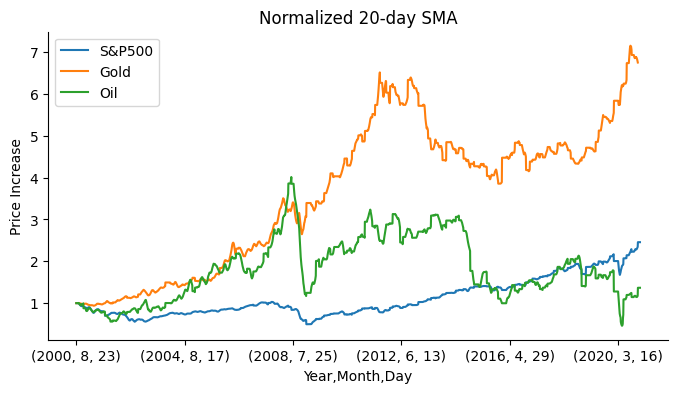

In [ ]:
legend_text = ['S&P500', 'Gold', 'Oil']
ax = range_asset_df[[*sma_cols.values()]].plot(kind='line', figsize=(8, 4), title=f'Normalized {rolling_period}-day SMA')
ax.set_ylabel('Price Increase')
ax.legend(legend_text)
plt.gca().spines[['top', 'right']].set_visible(False)

#### Total % Returns

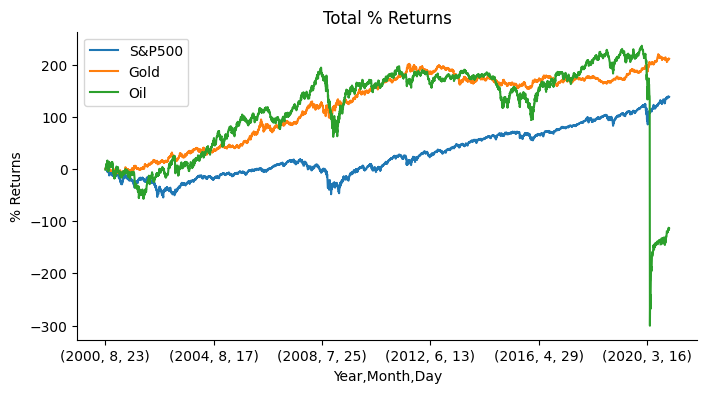

In [ ]:
ax = range_asset_df[[*cum_cols.values()]].plot(kind='line', figsize=(8, 4), title=f'Total % Returns')
ax.set_ylabel('% Returns')
ax.legend(legend_text)
plt.gca().spines[['top', 'right']].set_visible(False)

#### Asset Correlation

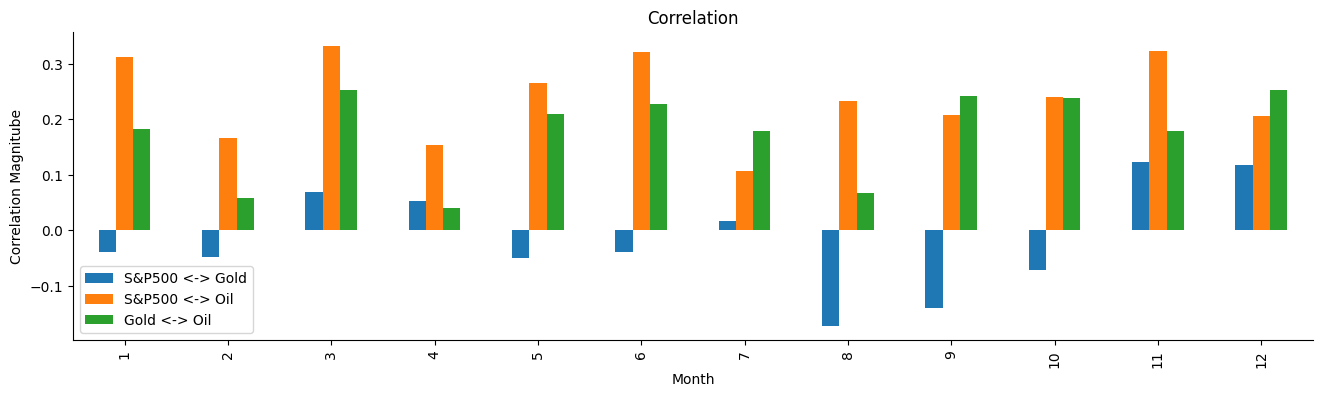

In [ ]:
ax = corr_df.plot(kind='bar', figsize=(16, 4), title=f'Correlation')
ax.set_ylabel('Correlation Magnitube')
ax.legend(['S&P500 <-> Gold', 'S&P500 <-> Oil', 'Gold <-> Oil'])
plt.gca().spines[['top', 'right']].set_visible(False)

#### Market Daily Overall Trend

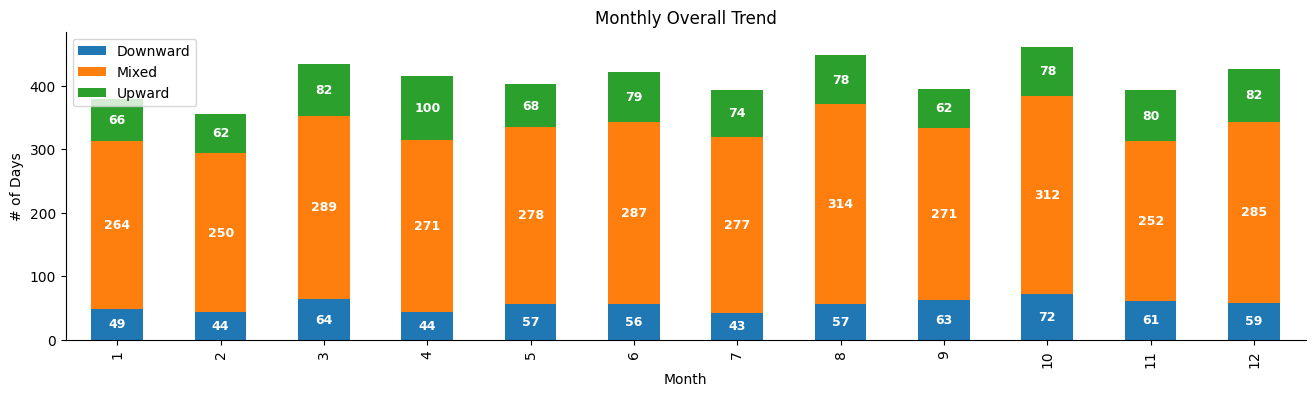

In [ ]:
ax = overall_pivot_df.plot(kind='bar', figsize=(16, 4), title=f'Monthly Overall Trend', stacked=True)
ax.set_ylabel('# of Days')
plt.gca().spines[['top', 'right']].set_visible(False)

for bar_container in ax.containers:
    for bar in bar_container:
        height = bar.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}',
                        xy=(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                        ha='center', va='center', color='white', fontsize=9, fontweight='bold')

#### Monthly Average Returns

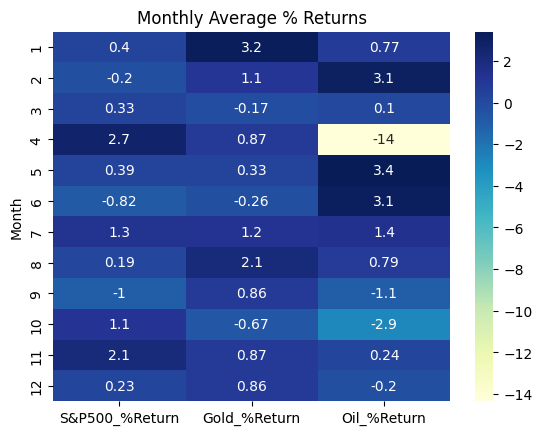

In [ ]:
ax = sb.heatmap(monthlyReturns, annot=True, cmap="YlGnBu")
ax.set_title('Monthly Average % Returns')
plt.show()

#### Alpha Beta Analysis

In [69]:
def alpha_beta_plot(ab_df, alpha_col, beta_col, id_name, base_id_name, y_label, x_label, title):
  alpha = ab_df.loc[id_name, alpha_col];
  beta = ab_df.loc[id_name, beta_col];
  ax = sb.regplot(x=base_id_name, y=id_name, data=monthlyReturns);
  ax.plot([0, 0], [0, alpha], color='red', linewidth=2);
  ax.plot(0, alpha, marker='x', color='red', markersize=10, markeredgewidth=3);
  ax.spines['bottom'].set_position('zero');
  ax.spines['left'].set_position('zero');
  sb.despine();
  ax.set_xlabel(x_label);
  ax.set_ylabel(y_label);
  ax.xaxis.set_label_coords(0.5, -0.07);
  ax.yaxis.set_label_coords(-0.07, 0.5);
  ax.annotate(
    f'$\\alpha$ = {alpha: .2f}',
    xy=(0, alpha),
    xytext=(-0.9, 1.5),
    textcoords='data',
    color='black',
    fontsize=9,
    arrowprops=dict(
        arrowstyle='->',
        color='black',
        lw=1,
        shrinkA=0, shrinkB=0
    )
  );

  ax.annotate(
    f'$\\beta$ = {beta: .2f}',
    xy=(0.5, alpha + (beta * 0.5)),
    xytext=(0.5, 2),
    textcoords='data',
    color='black',
    fontsize=9,
    arrowprops=dict(
        arrowstyle='->',
        color='black',
        lw=1,
        shrinkA=0, shrinkB=0
    )
  );
  ax.set_title(f"Alpha ($\\alpha$) - Beta ($\\beta$ - Slope) of {title} Monthly Returns");

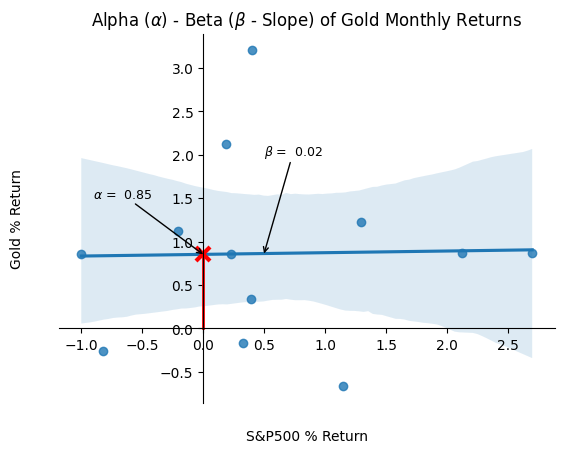

In [70]:
alpha_beta_plot(alpha_beta_df, 'Alpha', 'Beta', 'Gold_%Return', 'S&P500_%Return', 'Gold % Return', 'S&P500 % Return', 'Gold')

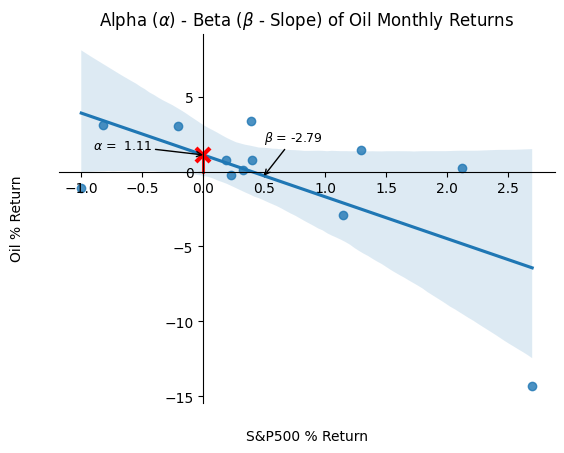

In [71]:
alpha_beta_plot(alpha_beta_df, 'Alpha', 'Beta', 'Oil_%Return', 'S&P500_%Return', 'Oil % Return', 'S&P500 % Return', 'Oil')